In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
# Load dataset
df = pd.read_csv('../data/raw/phone_usage_india.csv')

In [42]:
# Check for missing values in the dataframe
missing_values_count = df.isnull().sum()
total_missing_values = missing_values_count.sum()

missing_values_count, total_missing_values

(User ID                         0
 Age                             0
 Gender                          0
 Location                        0
 Phone Brand                     0
 OS                              0
 Screen Time (hrs/day)           0
 Data Usage (GB/month)           0
 Calls Duration (mins/day)       0
 Number of Apps Installed        0
 Social Media Time (hrs/day)     0
 E-commerce Spend (INR/month)    0
 Streaming Time (hrs/day)        0
 Gaming Time (hrs/day)           0
 Monthly Recharge Cost (INR)     0
 Primary Use                     0
 dtype: int64,
 np.int64(0))

In [7]:
print(df['Phone Brand'].unique())

['Vivo' 'Realme' 'Nokia' 'Samsung' 'Xiaomi' 'Oppo' 'Apple' 'Google Pixel'
 'Motorola' 'OnePlus']


In [3]:
len(df)

17686

In [4]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use'],
      dtype='object')

In [8]:
print(df['Location'].unique())

['Mumbai' 'Delhi' 'Ahmedabad' 'Pune' 'Jaipur' 'Lucknow' 'Kolkata'
 'Bangalore' 'Chennai' 'Hyderabad']


In [9]:
print(df['Gender'].unique())

['Male' 'Other' 'Female']


In [10]:
print(df['OS'].unique())

['Android' 'iOS']


In [11]:
print(df['Primary Use'].unique())

['Education' 'Gaming' 'Entertainment' 'Social Media' 'Work']


In [6]:
unique_combinations = df[['Phone Brand', 'OS']].drop_duplicates()
print(unique_combinations.to_string(index=False))

 Phone Brand      OS
        Vivo Android
      Realme     iOS
       Nokia Android
     Samsung Android
      Xiaomi     iOS
        Oppo     iOS
       Apple     iOS
        Oppo Android
      Realme Android
     Samsung     iOS
Google Pixel Android
       Apple Android
    Motorola     iOS
      Xiaomi Android
        Vivo     iOS
    Motorola Android
     OnePlus Android
Google Pixel     iOS
       Nokia     iOS
     OnePlus     iOS


In [ ]:
# Load dataset
df_cleaned = pd.read_csv('../data/cleaned/cleaned_standardized_phone_usage.csv')

In [15]:
unique_combinations = df_cleaned[['Phone Brand', 'OS']].drop_duplicates()
print(unique_combinations.to_string(index=False))

 Phone Brand      OS
        Vivo Android
      Realme Android
       Nokia Android
     Samsung Android
      Xiaomi Android
        Oppo Android
       Apple     iOS
Google Pixel Android
    Motorola Android
     OnePlus Android


In [14]:
unique_combinations = df_cleaned[['Phone Brand', 'OS','Number of Apps Installed',]].drop_duplicates()
print(unique_combinations.to_string(index=False))

 Phone Brand      OS  Number of Apps Installed
        Vivo Android                       104
      Realme Android                       169
       Nokia Android                        96
     Samsung Android                       146
      Xiaomi Android                        86
        Oppo Android                        25
       Apple     iOS                       123
      Realme Android                       188
        Oppo Android                       194
       Apple     iOS                        84
       Nokia Android                        27
        Oppo Android                       187
      Realme Android                       137
      Realme Android                       124
     Samsung Android                       121
Google Pixel Android                       161
       Apple     iOS                       183
       Apple     iOS                        62
Google Pixel Android                       188
    Motorola Android                        62
     Samsung 

In [16]:
df_cleaned.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Battery Consumption (mAh/day)
0,53.0,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education,222.0
1,60.0,Other,Delhi,Realme,Android,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming,506.0
2,37.0,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment,225.0
3,32.0,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment,770.0
4,16.0,Male,Mumbai,Xiaomi,Android,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media,143.0


In [17]:
# Summary statistics for numerical columns
df_cleaned.describe()


,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Battery Consumption (mAh/day)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367,428.319009
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067,221.935794
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000,50.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000,242.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000,420.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000,590.000000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000,1020.000000


In [43]:
# Count the occurrences of each primary use
df_cleaned['Primary Use'].value_counts()


Primary Use
Education        3601
Gaming           3576
Work             3557
Social Media     3501
Entertainment    3451
Name: count, dtype: int64

In [45]:
import pandas as pd

# Assuming 'df_cleaned' is your DataFrame
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['below 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'Age_Bracket' based on the age bins
df_cleaned['Age_Bracket'] = pd.cut(df_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

# Get value counts for the age brackets
age_bracket_counts = df_cleaned['Age_Bracket'].value_counts()

print(age_bracket_counts)


Age_Bracket
50-60       3962
40-50       3818
20-30       3815
30-40       3791
10-20       1941
60-70        359
below 10       0
70-80          0
80-90          0
90-100         0
Name: count, dtype: int64


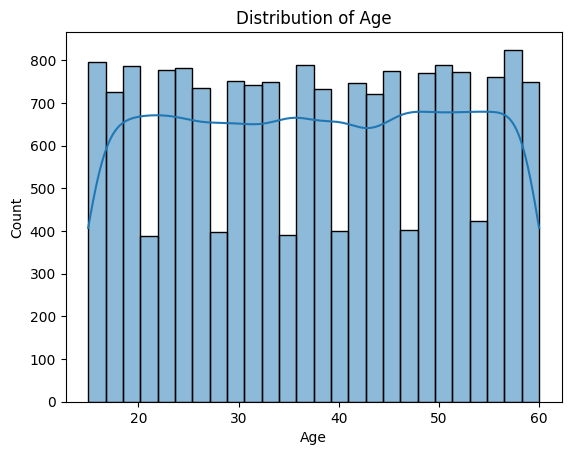

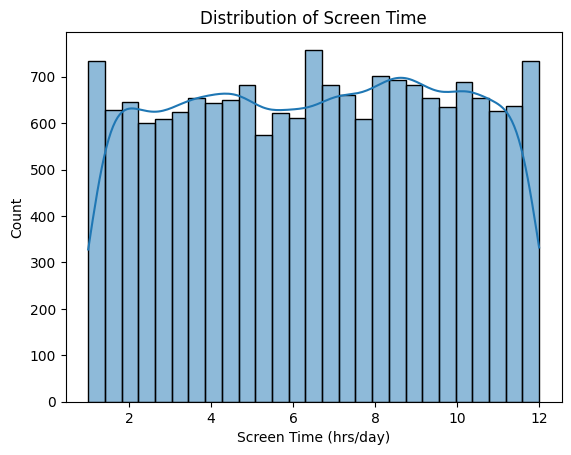

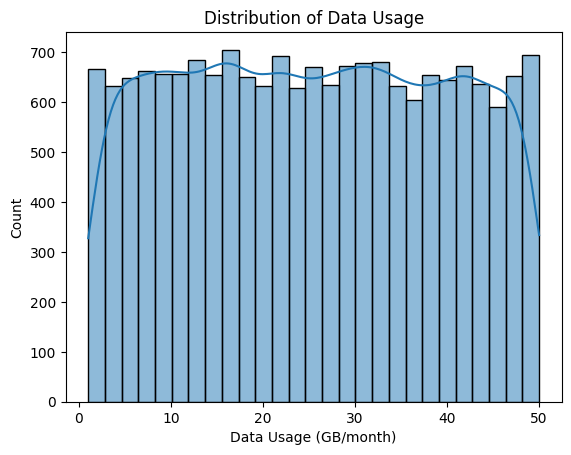

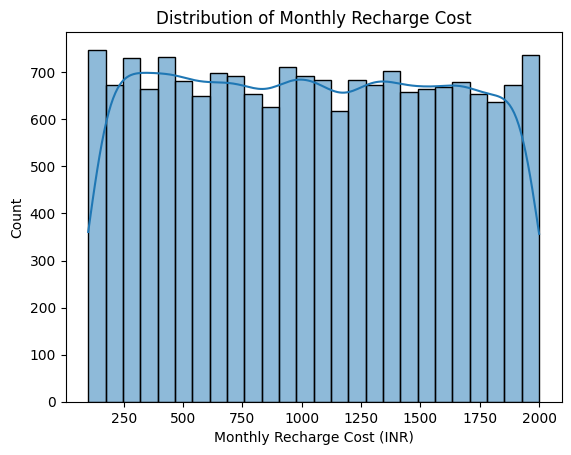

In [20]:
# Visualize the distribution of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(df_cleaned['Screen Time (hrs/day)'], kde=True)
plt.title('Distribution of Screen Time')
plt.show()

sns.histplot(df_cleaned['Data Usage (GB/month)'], kde=True)
plt.title('Distribution of Data Usage')
plt.show()

sns.histplot(df_cleaned['Monthly Recharge Cost (INR)'], kde=True)
plt.title('Distribution of Monthly Recharge Cost')
plt.show()


In [35]:
# Load dataset
df_processed = pd.read_csv('../data/processed/feature_engineered_data.csv')

In [36]:
df_processed.head()

,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use,Battery Consumption (mAh/day)
0,1.155788,1,0,0,0,0.456467,0.778626,0.477412,0.776505,0.768460,0.334604,0.792006,0.909296,0.694669,0,0.492322
1,1.680609,2,1,1,0,0.870413,0.826754,0.228865,0.942347,0.603420,0.849054,0.782931,0.187789,0.909472,1,0.766402
2,-0.043804,0,2,2,0,0.540442,0.584997,0.619307,0.749229,0.636718,0.687781,0.328050,0.759575,0.929270,2,0.496781
3,-0.418676,1,3,3,0,0.957238,0.799019,0.834091,0.892314,0.921217,0.536028,0.574642,0.146428,0.916846,2,0.906281
4,-1.618267,1,0,4,0,0.251097,0.172791,0.939161,0.711780,0.951892,0.012558,0.600605,0.666341,0.668248,3,0.346375


In [37]:
# Count the occurrences of each primary use
df_processed['Primary Use'].value_counts()


Primary Use
0    3601
1    3576
4    3557
3    3501
2    3451
Name: count, dtype: int64

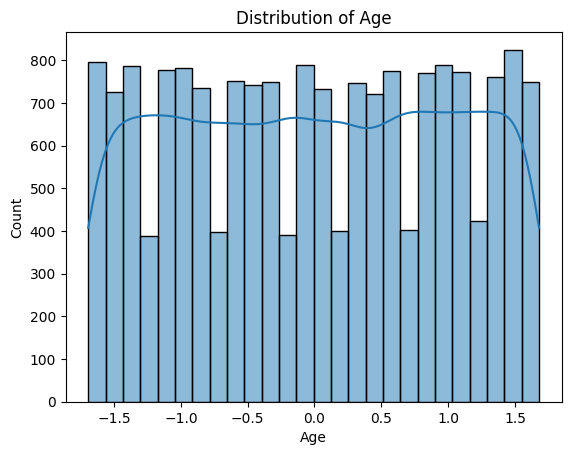

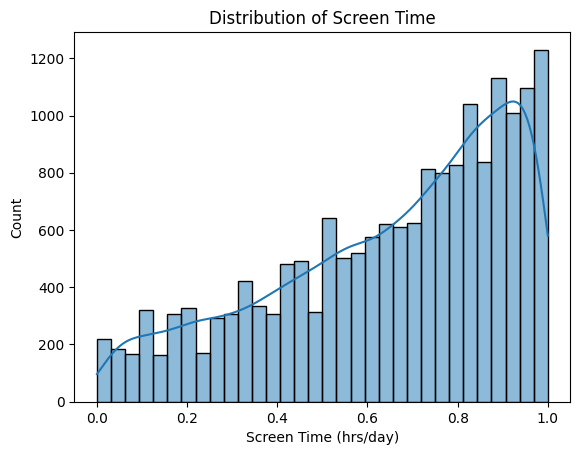

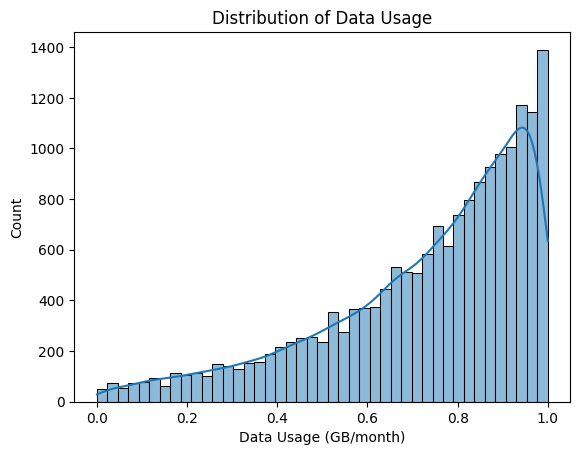

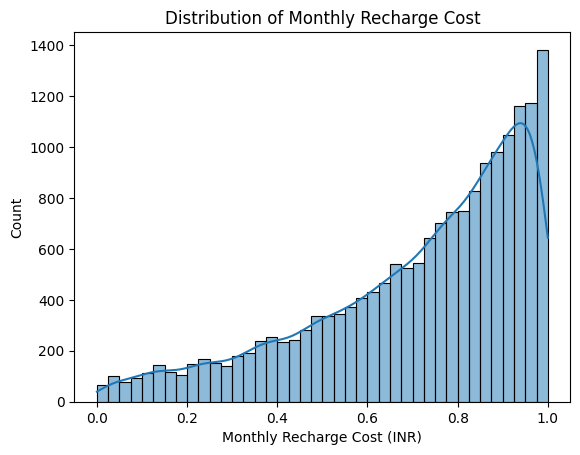

In [39]:
# Visualize the distribution of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_processed['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

sns.histplot(df_processed['Screen Time (hrs/day)'], kde=True)
plt.title('Distribution of Screen Time')
plt.show()

sns.histplot(df_processed['Data Usage (GB/month)'], kde=True)
plt.title('Distribution of Data Usage')
plt.show()

sns.histplot(df_processed['Monthly Recharge Cost (INR)'], kde=True)
plt.title('Distribution of Monthly Recharge Cost')
plt.show()
